In [109]:
# Read in Data & Sort by Date
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")


r = pd.read_csv("Ratings-Ginis.csv", dtype={'TOTAL': 'str', 'datetime':'str'}, parse_dates=['DATE'])
p = pd.read_csv("Products-Ginis.csv", dtype={'TOTAL': 'str', 'datetime':'str'}, parse_dates=['DATE'])

r = r.sort_values(by=['DATE'])
p = p.sort_values(by=['DATE'])


# Summary Info
print(f"Ratings: {r.shape}\nProducts: {p.shape}")
print(r.columns) #shared colnames


Ratings: (3288, 3)
Products: (3288, 3)
Index(['DATE', 'TOTAL', 'GINI'], dtype='object')


In [ ]:
# Plot Gini Coefficients Over Years - https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html


# Ratings -- Need sort the df by date
dates = r["DATE"]
gini_values = r["GINI"]

fig = plt.figure()
ax = plt.axes()
ax.plot(dates, gini_values, color="pink")
ax.set_title("Ratings - Gini Coefficients");


# Product Category
dates = p["DATE"]
gini_values = p["GINI"]

fig = plt.figure()
ax = plt.axes()
ax.plot(dates, gini_values)
ax.set_title("Products - Gini Coefficients");

In [2]:
# Get NP Arrays for Gini Values
ratings_array = r["GINI"].to_numpy()
products_array = p["GINI"].to_numpy()


# Normalize -- kind of unnecessary, Gini calculation itself serves as a sort of normalization for the original ratings data
r_norm = (ratings_array/ratings_array.max()*100) 

print(ratings_array, r_norm)

[0.41417541 0.41480417 0.40324111 ... 0.49732496 0.49729033 0.50056048] [76.3821438  76.4980991  74.3656417  ... 91.71656721 91.71017936
 92.31326003]


Great explanation of FFT & Input Data - https://stackoverflow.com/questions/59979354/what-is-the-difference-between-numpy-fft-fft-and-numpy-fft-fftfreq

Numpy Fast Fourier Transform Docs- https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft

Scipy FFT Tutorial + FFT Use Cases/Explanations- https://realpython.com/python-scipy-fft/

/Users/ckg-files/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


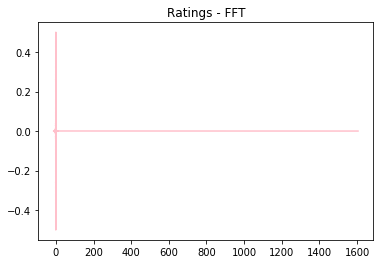

In [33]:
# Apply NP FFT to Ratings -- old method with Numpy
r_fft = np.fft.fft(ratings_array)
r_amplitude = np.abs(r_fft)

#np.abs() - It calculates √(a² + b²) for complex numbers, which is the magnitude for the two numbers added together - a single value importantly.
#Amplitude=Amplitude**2 ## Scaling
amp = r_amplitude[2:len(r_amplitude),] ## Scaling
amp = amp/len(amp) ## Scaling

r_freq = np.fft.fftfreq(len(ratings_array))
#mask = r_freq >= 0.0
#r_freq = r_freq[mask]
r_amplitude = r_amplitude[mask]


# Plot FFT Output
fig = plt.figure()
ax = plt.axes()
ax.set_title("Ratings - FFT");
ax.plot(r_fft, r_freq, color="pink")

In [49]:
print("orig", r_fft)
print("imaginary", r_fft.imag)

print("orig-len =", len(r_fft))
print("imag-len =", len(r_fft.imag))

orig [1605.12765165 +0.j          -11.68934697+57.49923088j
    9.11702137+12.71060995j ...   -1.73860669 -6.74159639j
    9.11702137-12.71060995j  -11.68934697-57.49923088j]
imaginary [  0.          57.49923088  12.71060995 ...  -6.74159639 -12.71060995
 -57.49923088]
orig-len = 3288
imag-len = 3288


In [60]:
r_amplitude
amp

array([9.52633396e-03, 4.24005761e-03, 7.75142594e-03, ...,
       9.31999464e-05, 3.74234108e-04, 4.76748041e-04])

Get Rid of Zero Frequency (first point in array after running FFT)

Take first half of array (waves are symmetric across axis) -- effectively bounded between 0 & 0.5 (x-axis)

*X-Axis is bounded between 0 & 0.5



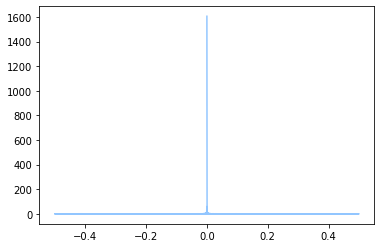

In [4]:
# SciPy Implementation of FFT
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 3288

yf = fft(ratings_array)
xf = fftfreq(N, d=1) #3288 days with 1 sample per day (n & d parameters respectively)

plt.plot(xf, np.abs(yf))
#plt.xlim(-0.001, 0.001)
plt.show()

/Users/ckg-files/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


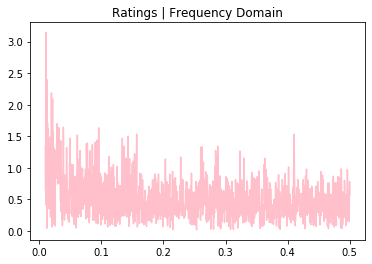

In [16]:
# SciPy Implementation of RFFT -- rfft returns the positive half of the signal in freq domain
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = 3288

x = rfftfreq(N, d=1) #3288 days with 1 sample per day (n & d parameters respectively)
y = rfft(ratings_array)

# Filter out the Zero-th Value
mask = x >= 0.01
x = x[mask]
y = y[mask]

plt.plot(x, np.abs(y), color="pink")
#plt.xlim(0.0, 0.01) #limit axis range
plt.axes().set_title("Ratings | Frequency Domain");
plt.show()

/Users/ckg-files/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


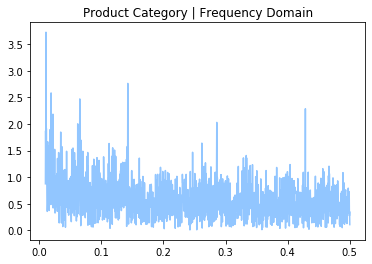

In [3]:
# RFFT Application - Product Category Data
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = 3288

x = rfftfreq(N, d=1) #3288 days with 1 sample per day (n & d parameters respectively)
y = rfft(products_array)

# Filter out the Zero-th Value
mask = x >= 0.01
x = x[mask]
y = y[mask]

plt.plot(x, np.abs(y))
#plt.xlim(0.0, 0.01) #limit axis range
plt.axes().set_title("Product Category | Frequency Domain");
plt.show()

Peaks in Above
- .14-ish is a once a week thing

# To-Do: 

- [X] Value Counts of Each Category for "Product Category" data set
- [_] Rank Order Correlation on Daily Frequency Distributions for "Product Category"
                                (3288 days)
    - [Spearman Rank Order Correlation Explained](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php)
    - Display Rank Order Corr. Matrix as Heatmap (ugly not preffered)


In [202]:
dfp

,datetime,product_category,count
0,2009-03-11,books,2581
1,2009-03-11,electronics,1127
2,2009-03-11,movies_and_tv,528
3,2009-03-11,cds_and_vinyl,527
4,2009-03-11,clothing_shoes_and_jewelry,355
...,...,...,...
95347,2009-09-25,fashion,0
95348,2009-10-10,fashion,0
95349,2010-03-27,fashion,0
95350,2010-07-31,fashion,0


In [203]:
p

,DATE,TOTAL,GINI,DOW
1917,2009-01-01,"[1872, 700, 452, 412, 389, 260, 204, 132, 102,...",0.749596,3
637,2009-01-02,"[2019, 828, 470, 431, 388, 285, 244, 197, 98, ...",0.742612,4
3095,2009-01-03,"[1862, 772, 440, 390, 318, 241, 224, 133, 97, ...",0.745127,5
1270,2009-01-04,"[2048, 714, 396, 315, 302, 275, 237, 148, 94, ...",0.756157,6
2077,2009-01-05,"[2230, 792, 469, 387, 338, 293, 287, 189, 111,...",0.745468,0
...,...,...,...,...
2791,2017-12-28,"[17524, 14205, 14045, 8105, 6729, 6084, 4952, ...",0.637275,3
1980,2017-12-29,"[16449, 12811, 12757, 7197, 5941, 5636, 4603, ...",0.633183,4
2650,2017-12-30,"[15976, 11387, 11192, 6474, 5065, 4989, 4161, ...",0.634054,5
2015,2017-12-31,"[14775, 9594, 8774, 5451, 4235, 3916, 3559, 28...",0.639837,6


In [162]:
# Value Counts of Product Category DataSet
dfp = pd.read_csv("ProductCategory.csv", dtype={'datetime':'str', 'product_category':'str'}, parse_dates=['datetime'])

# GroupBy `product_category` & take sum of `count`
vcs = dfp.groupby(['product_category'])['count'].agg('sum')

vcs = (vcs-vcs.min())/(vcs.max()-vcs.min()) #min-max scale
min_max_vals = [i for i in vcs]

# Softmax Scale
vcs_scaled = [(np.exp(i))/np.sum(np.exp(vcs)) for i in vcs] 
vcs = vcs.astype(dtype=np.float64) #inputs were too large to compute values as 32's (just passed output of min-max scaler instead)
vcs = np.exp(vcs)/np.sum(np.exp(vcs))
vcs = vcs.sort_values(ascending=False)

vcs

product_category
books                          0.077830
clothing_shoes_and_jewelry     0.055458
home_and_kitchen               0.044237
electronics                    0.043783
sports_and_outdoors            0.037261
cell_phones_and_accessories    0.035408
tools_and_home_improvement     0.034247
movies_and_tv                  0.033965
toys_and_games                 0.033787
automotive                     0.033548
pet_supplies                   0.032585
kindle_store                   0.032364
office_products                0.031954
patio_lawn_and_garden          0.031740
grocery_and_gourmet_food       0.031601
cds_and_vinyl                  0.030547
arts_crafts_and_sewing         0.030299
video_games                    0.030018
industrial_and_scientific      0.029601
digital_music                  0.029559
musical_instruments            0.029479
fashion                        0.029119
appliances                     0.028923
luxury_beauty                  0.028916
prime_pantry           

<BarContainer object of 29 artists>

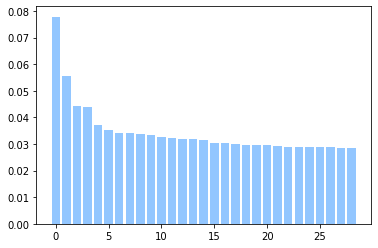

In [164]:
# Plot the Value_counts from Above
vcs.index
vals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
plt.bar(vals, vcs)
#plt.xticks(rotation=45) #Rotate X-Axis Ticks by N-degrees

In [110]:
p


,DATE,TOTAL,GINI
1917,2009-01-01,"[1872, 700, 452, 412, 389, 260, 204, 132, 102,...",0.749596
637,2009-01-02,"[2019, 828, 470, 431, 388, 285, 244, 197, 98, ...",0.742612
3095,2009-01-03,"[1862, 772, 440, 390, 318, 241, 224, 133, 97, ...",0.745127
1270,2009-01-04,"[2048, 714, 396, 315, 302, 275, 237, 148, 94, ...",0.756157
2077,2009-01-05,"[2230, 792, 469, 387, 338, 293, 287, 189, 111,...",0.745468
...,...,...,...
2791,2017-12-28,"[17524, 14205, 14045, 8105, 6729, 6084, 4952, ...",0.637275
1980,2017-12-29,"[16449, 12811, 12757, 7197, 5941, 5636, 4603, ...",0.633183
2650,2017-12-30,"[15976, 11387, 11192, 6474, 5065, 4989, 4161, ...",0.634054
2015,2017-12-31,"[14775, 9594, 8774, 5451, 4235, 3916, 3559, 28...",0.639837


In [178]:
# Map Date vars to Days of the Week
import datetime 

reduced_date = str(p.loc[0, "DATE"])
day_to_eval = reduced_date.split('-')
print("vals we are unpacking-", day_to_eval)
year = day_to_eval[0]
month = day_to_eval[1]
day = day_to_eval[2].split(" ")[0] #take the first element after this split of day_to_eval's 3rd element
year, month, day = int(year), int(month), int(day)

weekday = datetime.datetime(year, month, day).weekday()

date_to_day = { #pass in output of input year, month and date to the datetime's `weekday()` function
    0 : "Monday", 
    1 : "Tuesday", 
    2 : "Wednesday", 
    3 : "Thursday", 
    4 : "Friday", 
    5 : "Saturday", 
    6 : "Sunday" }

print(f"The Day {day} of Month {month} in Year {year} is a;\n{date_to_day[weekday]}")

vals we are unpacking- ['2009', '03', '11 00:00:00']
The Day 11 of Month 3 in Year 2009 is a;
Wednesday


In [133]:
# Add Day of Week to Product & Ratings Datasets
r_weekdays = []
p_weekdays = []

for i, row in r.iterrows():

    reduced_date = str(row["DATE"])
    day_to_eval = reduced_date.split('-')

    year = day_to_eval[0]
    month = day_to_eval[1]
    day = day_to_eval[2].split(" ")[0] #take the first element after this split of day_to_eval's 3rd element
    year, month, day = int(year), int(month), int(day)

    weekday = datetime.datetime(year, month, day).weekday()
    r_weekdays.append(weekday)


for i, row in p.iterrows():

    reduced_date = str(row["DATE"])
    day_to_eval = reduced_date.split('-')

    year = day_to_eval[0]
    month = day_to_eval[1]
    day = day_to_eval[2].split(" ")[0] #take the first element after this split of day_to_eval's 3rd element
    year, month, day = int(year), int(month), int(day)

    weekday = datetime.datetime(year, month, day).weekday()
    p_weekdays.append(weekday)


r["DOW"] = r_weekdays
p["DOW"] = p_weekdays

# Write Out New Data
#r.to_csv("Ratings-Ginis.csv", index=False)
#p.to_csv("Products-Ginis.csv", index=False)

In [134]:
p

,DATE,TOTAL,GINI,DOW
1917,2009-01-01,"[1872, 700, 452, 412, 389, 260, 204, 132, 102,...",0.749596,3
637,2009-01-02,"[2019, 828, 470, 431, 388, 285, 244, 197, 98, ...",0.742612,4
3095,2009-01-03,"[1862, 772, 440, 390, 318, 241, 224, 133, 97, ...",0.745127,5
1270,2009-01-04,"[2048, 714, 396, 315, 302, 275, 237, 148, 94, ...",0.756157,6
2077,2009-01-05,"[2230, 792, 469, 387, 338, 293, 287, 189, 111,...",0.745468,0
...,...,...,...,...
2791,2017-12-28,"[17524, 14205, 14045, 8105, 6729, 6084, 4952, ...",0.637275,3
1980,2017-12-29,"[16449, 12811, 12757, 7197, 5941, 5636, 4603, ...",0.633183,4
2650,2017-12-30,"[15976, 11387, 11192, 6474, 5065, 4989, 4161, ...",0.634054,5
2015,2017-12-31,"[14775, 9594, 8774, 5451, 4235, 3916, 3559, 28...",0.639837,6


In [165]:
dfp

,datetime,product_category,count
0,2009-03-11,books,2581
1,2009-03-11,electronics,1127
2,2009-03-11,movies_and_tv,528
3,2009-03-11,cds_and_vinyl,527
4,2009-03-11,clothing_shoes_and_jewelry,355
...,...,...,...
95347,2009-09-25,fashion,0
95348,2009-10-10,fashion,0
95349,2010-03-27,fashion,0
95350,2010-07-31,fashion,0


In [189]:
# Explode `TOTAL` into separate Columns, then create corrmatrix
p.corr()

exploded_columns = {
 0 : [],
 1 : [],
 2 : [],
 3 : [],
 4 : [],
 5 : [],
 6 : [],
 7 : [],
 8 : [],
 9 : [],
 10 : [],
 11 : [],
 12 : [],
 13 : [],
 14 : [],
 15 : [],
 16 : [],
 17 : [],
 18 : [],
 19 : [],
 20 : [],
 21 : [],
 22 : [],
 23 : [],
 24 : [],
 25 : [],
 26 : [],
 27 : [],
 28 : [], 
 "DATE" : []
 }


for i, row in p.iterrows():
    date = row["DATE"]
    exploded_columns["DATE"].append(date)
    total_val = row["TOTAL"]
    total_val = total_val[1:-1]
    total_val = total_val.split(', ') #len of each of these is 29 -- correct num of columns

    # Append for Each Column Individually
    for c in range(0, len(total_val)):
        val_to_append = total_val[c]
        val_to_append = int(val_to_append)
        exploded_columns[c].append(val_to_append)
    


p_exploded = pd.DataFrame.from_dict(exploded_columns)

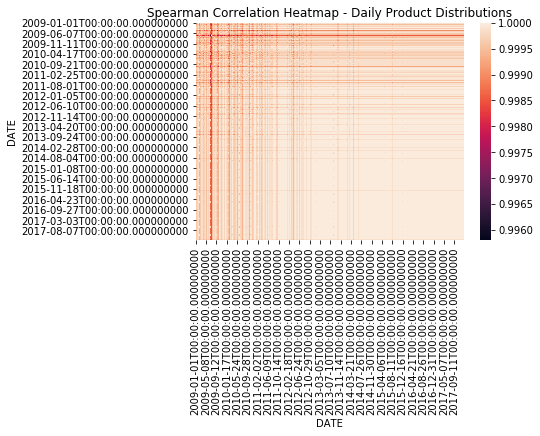

In [219]:
# Spearman Correlation of The Distribution of Product Reviews for each day in Dataset
import seaborn as sns


#plt.figure(figsize=(60,50))
#sns.set(font_scale=4)

cm = p_exploded.corr(method='spearman') #base method, improved with below after working with KC 
#matrix = np.tril(p_exploded.corr(method='spearman'))

#sns.heatmap(cm, annot=False, mask=matrix, vmin=-1, vmax=1, center= 0,linewidths=.5, linecolor='black') #half masked and scaled output
sns.heatmap(cm, annot=False,linecolor='black')
plt.title("Spearman Correlation Heatmap - Daily Product Distributions") #, fontsize=80)
#plt.tick_params(labelsize=50)
#plt.xticks(rotation = 180);

plt.show()

In [211]:
p_exploded.set_index("DATE", inplace=True)
p_exploded.transpose()

DATE,2009-01-01,2009-01-02,2009-01-03,2009-01-04,2009-01-05,2009-01-06,2009-01-07,2009-01-08,2009-01-09,2009-01-10,2009-01-11,2009-01-12,2009-01-13,2009-01-14,2009-01-15,2009-01-16,2009-01-17,2009-01-18,2009-01-19,2009-01-20,2009-01-21,2009-01-22,2009-01-23,2009-01-24,2009-01-25,2009-01-26,2009-01-27,2009-01-28,2009-01-29,2009-01-30,2009-01-31,2009-02-01,2009-02-02,2009-02-03,2009-02-04,2009-02-05,2009-02-06,2009-02-07,2009-02-08,2009-02-09,2009-02-10,2009-02-11,2009-02-12,2009-02-13,2009-02-14,2009-02-15,2009-02-16,2009-02-17,2009-02-18,2009-02-19,...,2017-11-13,2017-11-14,2017-11-15,2017-11-16,2017-11-17,2017-11-18,2017-11-19,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,2017-11-26,2017-11-27,2017-11-28,2017-11-29,2017-11-30,2017-12-01,2017-12-02,2017-12-03,2017-12-04,2017-12-05,2017-12-06,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,2018-01-01
0,1872,2019,1862,2048,2230,5134,4419,2633,3025,2128,4073,3725,3460,2846,2146,1935,2252,3306,3613,2385,2612,2435,2192,2194,2341,2740,2843,2757,2451,2553,2412,2348,2938,2619,2643,2854,2780,2505,2930,3123,2664,2532,2719,2459,2369,2684,3240,2596,2719,2739,...,19717,21910,26753,20432,15077,14339,14323,14620,14296,12211,8918,11796,12720,14717,15608,16589,22942,38432,18332,14755,14931,16619,17282,16447,17207,15635,15078,16075,17990,17126,17124,15452,14352,19188,24691,24453,17532,14429,13563,12494,11166,9226,10712,17221,17778,17524,16449,15976,14775,16915
1,700,828,772,714,792,4072,3495,1304,2006,1060,2229,2486,1557,1464,900,711,1089,1919,2197,1328,1260,973,948,916,1040,1307,1298,1167,1189,1201,1266,929,1418,1169,1079,1303,1303,1079,1232,1283,973,1042,1245,942,1021,1159,1275,1024,1240,1176,...,16456,14133,20475,14420,10315,9897,9259,10522,9481,8678,5601,8337,8929,10150,12579,12380,15118,17613,15900,11504,11752,13742,13987,14079,13995,11096,10677,11964,14508,13704,13503,12571,10863,12881,18896,22261,14544,11819,10176,9519,8030,6428,8441,14370,14915,14205,12811,11387,9594,10509
2,452,470,440,396,469,2349,2364,756,917,497,1396,1344,1227,868,553,392,517,964,983,702,693,537,478,621,593,571,670,603,604,661,633,593,724,629,611,577,600,562,637,627,499,576,673,544,512,601,711,555,579,567,...,10888,12487,16028,11844,9600,9062,8967,10355,9403,8425,5360,7923,8448,9392,11833,11837,12269,12889,10888,10184,10647,12767,12448,12867,13697,11015,10541,11673,14001,12968,13056,11995,10745,11985,15231,17247,12961,11679,10170,9418,7692,6211,8167,14343,14676,14045,12757,11192,8774,9783
3,412,431,390,315,387,1509,1475,685,902,464,1203,1146,924,707,448,367,504,801,932,536,543,505,467,504,440,508,579,548,559,507,526,441,534,571,486,535,453,442,503,526,490,512,514,500,472,442,504,464,506,496,...,6701,8011,10030,6940,5721,5435,5341,6302,5871,5374,4069,4875,5373,6124,7787,7477,7299,7400,6426,5960,6058,7521,7254,7734,7585,6272,6003,6692,7911,7211,7345,6731,6346,6679,7864,9132,7298,6332,5423,5294,4452,3791,6154,8743,8419,8105,7197,6474,5451,5825
4,389,388,318,302,338,1388,1131,526,638,431,830,817,719,548,325,243,482,735,692,533,451,326,339,343,403,382,425,421,368,429,405,329,516,390,347,398,412,311,423,398,324,406,382,296,377,392,379,371,392,349,...,5282,6109,8350,5789,4585,4152,4035,4787,4191,3899,2602,3333,3760,4386,5308,5241,5737,6312,4616,4049,4207,5283,5132,5628,5949,4580,4427,4912,5890,5295,5676,5072,4585,5210,6798,7969,5443,4749,4177,3766,3325,2932,5152,7898,7872,6729,5941,5065,4235,4590
5,260,285,241,275,293,1279,1116,521,627,386,793,771,665,496,271,229,439,647,687,375,409,289,247,246,270,283,376,294,283,325,267,253,345,293,296,380,354,269,314,328,304,297,379,292,274,290,367,312,310,288,...,4923,5643,7379,5057,4112,4083,4026,4246,4060,3558,2559,3330,3724,4048,5014,5073,4923,4967,4228,3925,4173,5035,4869,5245,5288,4440,4235,4689,5499,4902,5161,4544,4195,5137,6325,6950,512

In [218]:
cm = p_exploded.transpose().corr("spearman")
cm

DATE,2009-01-01,2009-01-02,2009-01-03,2009-01-04,2009-01-05,2009-01-06,2009-01-07,2009-01-08,2009-01-09,2009-01-10,2009-01-11,2009-01-12,2009-01-13,2009-01-14,2009-01-15,2009-01-16,2009-01-17,2009-01-18,2009-01-19,2009-01-20,2009-01-21,2009-01-22,2009-01-23,2009-01-24,2009-01-25,2009-01-26,2009-01-27,2009-01-28,2009-01-29,2009-01-30,2009-01-31,2009-02-01,2009-02-02,2009-02-03,2009-02-04,2009-02-05,2009-02-06,2009-02-07,2009-02-08,2009-02-09,2009-02-10,2009-02-11,2009-02-12,2009-02-13,2009-02-14,2009-02-15,2009-02-16,2009-02-17,2009-02-18,2009-02-19,...,2017-11-13,2017-11-14,2017-11-15,2017-11-16,2017-11-17,2017-11-18,2017-11-19,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,2017-11-26,2017-11-27,2017-11-28,2017-11-29,2017-11-30,2017-12-01,2017-12-02,2017-12-03,2017-12-04,2017-12-05,2017-12-06,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,2018-01-01
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01,1.000000,0.999014,0.999260,0.998767,0.999261,0.999261,0.999014,0.999507,0.998891,0.999384,0.999384,0.998767,0.999137,0.999137,0.999261,0.999260,0.999137,0.999384,0.999507,0.999384,0.999261,0.999137,0.998397,0.998397,0.999384,0.999261,0.999507,0.998891,0.999261,0.999014,0.999137,0.999384,0.999630,0.998521,0.998396,0.999137,0.998767,0.999137,0.999507,0.999507,0.999384,0.999384,0.998397,0.999384,0.998890,0.999137,0.999384,0.999384,0.999137,0.999137,...,0.999507,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999261,0.999384,0.999384,0.999384,0.999384,0.999384,0.999137,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999137,0.999137,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999384,0.999261,0.999384,0.999261,0.999384,0.999384,0.999384
2009-01-02,0.999014,1.000000,0.998891,0.999014,0.999384,0.999261,0.999014,0.999137,0.999384,0.999014,0.999507,0.999014,0.999137,0.999260,0.999261,0.998891,0.999014,0.999014,0.999261,0.999507,0.999261,0.999630,0.998150,0.998521,0.999137,0.999630,0.999630,0.999137,0.999630,0.999384,0.999877,0.999507,0.999384,0.999384,0.998396,0.999261,0.999014,0.999014,0.999261,0.999261,0.999137,0.999507,0.998521,0.999384,0.998644,0.999137,0.999507,0.999014,0.999261,0.999137,...,0.999261,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999630,0.999507,0.999507,0.999507,0.999507,0.999507,0.999261,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.998521,0.999630,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999507,0.999384,0.999507,0.999261,0.999507,0.999507,0.999507
2009-01-03,0.999260,0.998891,1.000000,0.999014,0.999261,0.999507,0.999261,0.999507,0.999261,0.999630,0.999630,0.999014,0.999014,0.999137,0.999754,0.999137,0.999507,0.999630,0.999507,0.999630,0.999507,0.999261,0.999384,0.999384,0.999384,0.999507,0.999507,0.999261,0.999507,0.999137,0.999014,0.999630,0.999630,0.998767,0.998643,0.999384,0.999137,0.999261,0.999507,0.999507,0.999384,0.999630,0.999384,0.999630,0.999137,0.999877,0.999630,0.999877,0.999384,0.999014,...,0.999754,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999507,0.999630,0.999630,0.999630,0.999630,0.999630,0.999384,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999384,0.999261,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999630,0.999384,0.999630,0.999507,0.999630,0.999630,0.999630
2009-01-04,0.998767,0.999014,0.999014,1.

In [201]:
pd.set_option("display.max_columns", 100)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.000000,0.944443,0.931804,0.939884,0.947797,0.946166,0.951900,0.949899,0.951854,0.952695,0.952866,0.949283,0.949588,0.952343,0.949617,0.956114,0.949878,0.955157,0.958581,0.951011,0.954857,0.932061,0.934548,0.935604,0.931709,0.922017,0.923011,0.927500,0.924386
1,0.944443,1.000000,0.983397,0.984273,0.984647,0.983325,0.982301,0.983291,0.985719,0.985004,0.984851,0.984006,0.981734,0.974397,0.968766,0.967011,0.965984,0.964852,0.968012,0.975868,0.973827,0.979905,0.976330,0.977932,0.974338,0.970989,0.955270,0.940948,0.880424
2,0.931804,0.983397,1.000000,0.987792,0.987610,0.982391,0.984476,0.986882,0.986346,0.984138,0.982342,0.982713,0.978840,0.966133,0.959283,0.961289,0.961558,0.957220,0.963478,0.974496,0.964465,0.969908,0.981023,0.983488,0.980078,0.976067,0.949113,0.947113,0.869426
3,0.939884,0.984273,0.987792,1.000000,0.988753,0.992191,0.986374,0.990118,0.989499,0.987712,0.985619,0.985706,0.982713,0.982616,0.976627,0.974118,0.977016,0.977139,0.978865,0.984825,0.979225,0.978412,0.973577,0.975708,0.972215,0.974465,0.969574,0.953522,0.887744
4,0.947797,0.984647,0.987610,0.988753,1.000000,0.991931,0.990360,0.991932,0.990960,0.990252,0.989704,0.989181,0.986932,0.979282,0.975361,0.973928,0.973655,0.969813,0.975101,0.982698,0.976220,0.977678,0.980045,0.982738,0.978695,0.978383,0.961432,0.949299,0.885934
5,0.946166,0.983325,0.982391,0.992191,0.991931,1.000000,0.989686,0.991109,0.991128,0.989615,0.988893,0.988882,0.987378,0.986922,0.982492,0.978858,0.979765,0.979050,0.981633,0.986151,0.982138,0.980853,0.974729,0.976883,0.973144,0.975108,0.973340,0.954030,0.891811
6,0.951900,0.982301,0.984476,0.986374,0.990360,0.989686,1.000000,0.992840,0.989707,0.989242,0.988094,0.987140,0.985076,0.977930,0.973539,0.975392,0.973458,0.970978,0.977662,0.982758,0.975640,0.975100,0.976754,0.979222,0.976576,0.974416,0.961462,0.953894,0.892032
7,0.949899,0.983291,0.986882,0.990118,0.991932,0.991109,0.992840,1.000000,0.993775,0.991687,0.989799,0.988298,0.985689,0.981466,0.977642,0.976285,0.974313,0.973809,0.980909,0.984542,0.979866,0.978241,0.978576,0.980891,0.976892,0.976780,0.964469,0.954187,0.892267
8,0.951854,0.985719,0.986346,0.989499,0.990960,0.991128,0.989707,0.993775,1.000000,0.996448,0.994533,0.992757,0.990191,0.985400,0.981806,0.978029,0.976160,0.976063,0.982323,0.987812,0.983389,0.981887,0.982338,0.984475,0.979989,0.979465,0.967003,0.953338,0.894429
9,0.952695,0.985004,0.984138,0.987712,0.990252,0.989615,0.989242,0.991687,0.996448,1.000000,0.996676,0.994205,0.991484,0.986073,0.982872,0.980312,0.977489,0.976624,0.982814,0.988272,0.985139,0.982173,0.982705,0.984557,0.980496,0.979262,0.965625,0.952427,0.894070


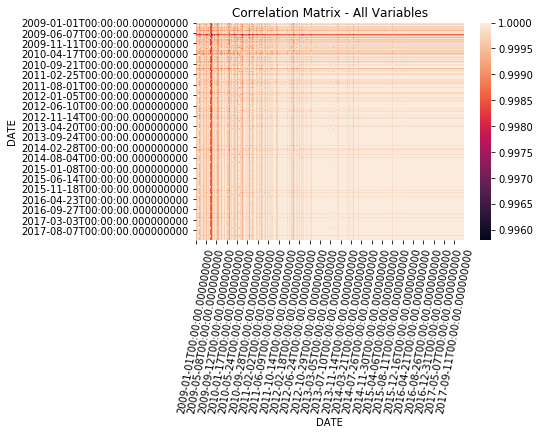

In [217]:
# Rank Order Correlation - Computed on Daily Values?
from scipy.stats import spearmanr
import seaborn as sbn

#r_value, p_value = spearmanr(dfp["datetime"], dfp["product_category"])
#r_value, p_value = spearmanr(r["DATE"], r["GINI"])

import seaborn as sns

#plt.figure(figsize=(60,50))
#sns.set(font_scale=4)
#matrix = np.tril(r.corr())
#cm = r.corr()
sns.heatmap(cm, annot=False)
#sns.heatmap(cm, annot=False, mask=matrix, vmin=-1, vmax=1, center= 0,linewidths=.5, linecolor='black')
plt.title("Correlation Matrix - All Variables") #, fontsize=80)
#plt.tick_params(labelsize=50)
plt.xticks(rotation = 80);

plt.show()

In [143]:
# GroupBy DOW's & Make Correlation Matrix
p_dow = p.groupby(['DOW'])["GINI"].agg('mean') 

p_dow.corr(other=None, method='pearson', min_periods=6)

TypeError: unsupported type: <class 'NoneType'>

In [147]:
p_dow
vals = p["DOW"].unique()
matrix = np.corrcoef(vals, vals)
print(matrix)

[[1. 1.]
 [1. 1.]]
